In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow.keras.layers import Flatten,Dense,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

from glob import glob

In [46]:
image_size=[224,224,3]
vgg=VGG16(input_shape=image_size,weights='imagenet',include_top=False)

for layers in vgg.layers:
    layers.trainable=False

folders=glob('Data/train/*')

In [16]:
# vgg.summary()

In [17]:
len(folders)

2

In [47]:
x=Flatten()(vgg.output)
pred=Dense(len(folders),activation='softmax')(x)
model=Model(vgg.inputs,pred)

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [50]:
train=train_datagen.flow_from_directory('Data/train',target_size=(224,224),batch_size=32,class_mode='categorical')

test=test_datagen.flow_from_directory('Data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 184 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [52]:
r = model.fit_generator(train,validation_data=test,
                        epochs=5,steps_per_epoch=len(train),
                        validation_steps=len(test))

Epoch 1/5
6/6 [==============================] - 208s 35s/step - loss: 1.1467 - accuracy: 0.5326 - val_loss: 1.9219 - val_accuracy: 0.0625
Epoch 2/5
6/6 [==============================] - 190s 32s/step - loss: 0.1940 - accuracy: 0.8913 - val_loss: 4.5915 - val_accuracy: 0.0000e+00
Epoch 3/5
6/6 [==============================] - 188s 31s/step - loss: 0.0592 - accuracy: 0.9891 - val_loss: 5.0483 - val_accuracy: 0.0000e+00
Epoch 4/5
6/6 [==============================] - 186s 31s/step - loss: 0.0450 - accuracy: 0.9946 - val_loss: 6.3738 - val_accuracy: 0.0000e+00
Epoch 5/5
6/6 [==============================] - 194s 32s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 7.2117 - val_accuracy: 0.0000e+00


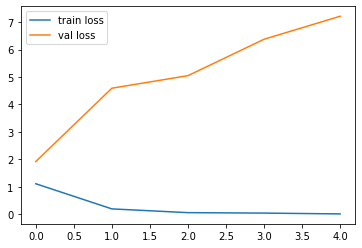

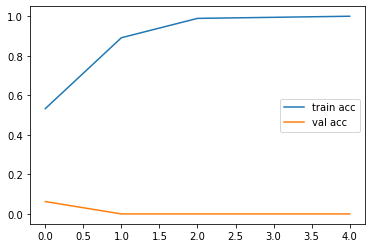

In [54]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [57]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('facefeatures_new_model.h5')